In [5]:
# pip install scikit-learn transformers matplotlib

In [1]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA


ModuleNotFoundError: No module named 'transformers'

In [15]:
def digit_to_word(digit):
    word_dict = {
        '0': 'zero',
        '1': 'one',
        '2': 'two',
        '3': 'three',
        '4': 'four',
        '5': 'five',
        '6': 'six',
        '7': 'seven',
        '8': 'eight',
        '9': 'nine',
    }

    # Convert tensor elements to strings and map using the dictionary
    return [word_dict.get(str(d.item()), 'unknown') for d in digit]

In [22]:
# Sample dataset
dataset = digit_to_word(torch.tensor([0,1,2,3,4,5,6,7,8,9,9,9]))

In [24]:
dataset

['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine',
 'nine',
 'nine']

In [23]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA


# # Sample dataset
# dataset = [
#     'one boy and two dogs', 'two','three','one', 'two','three','one', 'two','three','one', 'two','three','one', 'two','three'
#     # Add more sentences as needed
# ]
# Step 1: Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = tokenizer(dataset, padding=True, truncation=True, return_tensors='pt')

# Step 2: Obtaining Embeddings
model = BertModel.from_pretrained('bert-base-uncased')
with torch.no_grad():
    outputs = model(**tokenized_texts)

# Extract the embeddings for each sentence
embeddings = outputs.last_hidden_state[:, 0, :]  # Extract embeddings for [CLS] token

# Step 3: Dimensionality Reduction with PCA
n_components = min(10, embeddings.shape[1])  # Set n_components to be less than or equal to the number of features
pca = PCA(n_components=n_components)
embeddings_reduced = pca.fit_transform(embeddings)

# Print the reduced embeddings
print("Reduced Embeddings shape:", embeddings_reduced.shape)
print("Reduced Embeddings:", embeddings_reduced)

Reduced Embeddings shape: (12, 10)
Reduced Embeddings: [[-1.35483017e+00  2.83730442e+00 -1.59382267e+00 -1.78759244e-01
   4.16839147e-01  2.54847272e-01  1.00929160e-01  7.60469733e-02
   1.26888512e-02  6.77622292e-16]
 [ 1.47180889e+00  1.53807397e+00  1.89075082e+00 -1.42928837e+00
  -3.67352037e-01 -1.91922436e-01  5.00334733e-02 -2.30013847e-02
  -1.13014739e-02  6.77622292e-16]
 [ 5.25073335e+00  6.48742269e-01  4.59993114e-01  1.68743296e+00
   2.29138813e-01  1.70471491e-01 -2.95726369e-02 -2.42961520e-02
   1.36572639e-02  6.77622292e-16]
 [ 3.32678364e+00 -9.73974156e-01 -1.52830707e+00 -7.23986340e-01
  -1.21546778e+00 -1.43203784e-01  1.48581590e-01  3.36304400e-03
  -8.18041223e-02  6.77622292e-16]
 [ 1.45015289e+00 -1.06861063e+00 -4.10892292e-01 -7.47370913e-01
   1.45622298e+00 -7.66172731e-01 -1.08374393e-01 -1.96262548e-01
   1.99971215e-01  6.77622292e-16]
 [-5.93001380e-02 -9.07339529e-01  8.70469226e-02 -5.43175394e-01
   3.32905089e-01  1.21072944e+00 -7.1586101

In [2]:
# Get the vocabulary size excluding special tokens
vocab_size_excluding_special = tokenizer.vocab_size - tokenizer.num_special_tokens_to_add()

# Print the vocabulary size excluding special tokens
print("Vocabulary Size (excluding special tokens):", vocab_size_excluding_special)


Vocabulary Size (excluding special tokens): 30520


In [3]:
import torch

def digit_to_word(digit):
    word_dict = {
        '0': 'zero',
        '1': 'one',
        '2': 'two',
        '3': 'three',
        '4': 'four',
        '5': 'five',
        '6': 'six',
        '7': 'seven',
        '8': 'eight',
        '9': 'nine',
    }

    # Convert tensor elements to strings and map using the dictionary
    string_representations = [word_dict.get(str(d.item()), 'unknown') for d in digit]

    # Return the list of strings
    return string_representations

# Example usage:
digits = torch.tensor([1, 2, 3, 4, 5])
word_representations = digit_to_word(digits)
print(f"{digits} becomes {word_representations}")


tensor([1, 2, 3, 4, 5]) becomes ['one', 'two', 'three', 'four', 'five']


In [4]:
import label_embedding

In [5]:
label_embedding.label_embedding(word_representations)

array([[-9.15837019e-01,  2.55886055e+00,  8.54042530e-01,
         2.82013066e-01,  1.01663013e-15],
       [ 3.54278325e+00,  5.49610405e-01, -9.03860827e-01,
        -2.83396282e-01,  1.01663013e-15],
       [ 9.08933572e-01, -1.76249892e+00,  1.55149586e+00,
        -1.48567446e-01,  1.01663013e-15],
       [-1.10762063e+00, -9.61675566e-01, -8.11972534e-01,
         1.33378403e+00,  1.01663013e-15],
       [-2.42825918e+00, -3.84296470e-01, -6.89705028e-01,
        -1.18383337e+00,  1.01663013e-15]])

In [6]:
import matplotlib.pyplot as plt
import random

def draw_graph(image_idx):
    colors = []
    # Data for the pie chart
    # labels = ['Category A', 'Category B', 'Category C', 'Category D']
    sizes = [.25, .30, .20, .25]  # Percentage distribution for each category
    colors_blue = ['blue', 'lightblue', 'skyblue', 'deepskyblue']
    colors_red = ['red', 'lightcoral', 'tomato', 'darkred']
    colors.append(colors_blue)
    colors.append(colors_red)
    # Plotting the pie chart
    
    color_choice = random.choice([0,1])
    num1 = random.random()
    num2 = random.random()
    num3 = random.random()
    normalization_factor = 1 / (num1 + num2 + num3)
    
    # Normalize the numbers
    num1 *= normalization_factor
    num2 *= normalization_factor
    num3 *= normalization_factor
    sizes = [num1, num2, num3]
    plt.pie(sizes, colors=colors[color_choice], autopct='%1.1f%%', startangle=90)
    # plt.title('Blue Pie Chart')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    image_path = os.path.join(output_dir, f"{colors[color_choice][0]}_{image_idx}_{color_choice}.png")
    plt.savefig(image_path)
    
    # Close the current figure to free up resources
    plt.close()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Create a directory to save the images
output_dir = "image_dataset"
os.makedirs(output_dir, exist_ok=True)

# Function to generate and save images
def generate_and_save_image(image_idx):

    # Save the plot as an image using PIL
    draw_graph(image_idx)

# Generate and save a few images
num_images = 20000
for i in range(num_images):
    generate_and_save_image(i)

# Optionally, you can use the following code to load and display an image



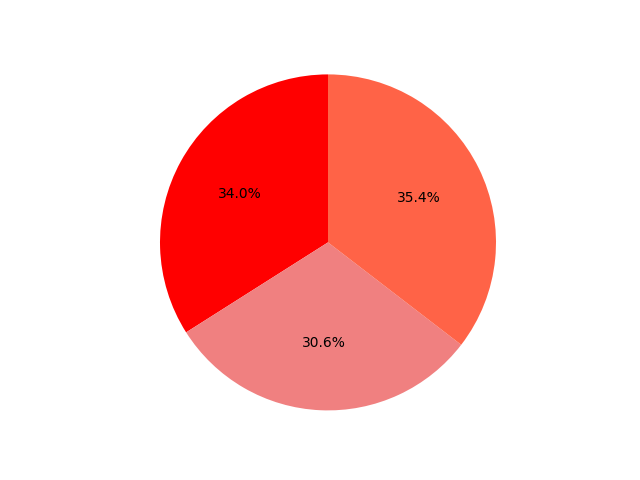

torch.Size([4, 480, 640])
torch.Size([3, 480, 640])


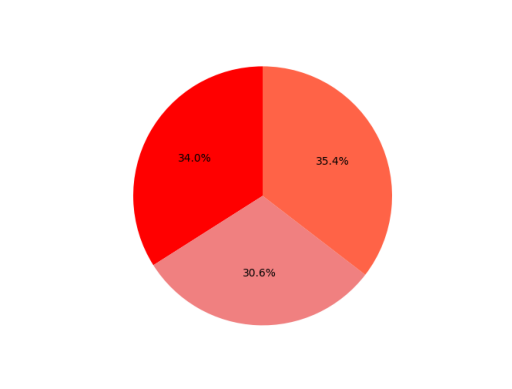

In [6]:
import os
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

output_dir = "image_dataset"
image_path = os.path.join(output_dir, "red_17200_1.png")
img = Image.open(image_path)
img.show()
transform = transforms.ToTensor()

# Apply the transformation to the image
tensor_image = transform(img)

# Now, tensor_image is a PyTorch tensor
print(tensor_image.shape)
rgb_image = tensor_image[:3, :, :]

# Convert tensor to PIL Image
pil_image = transforms.ToPILImage()(rgb_image)

# Display the image
plt.imshow(pil_image)
print(rgb_image.size())
plt.axis('off')  # Turn off axis labels
plt.show()

In [1]:
import matplot_dataset

In [2]:
image_dataset = matplot_dataset.matplot_dataset("image_dataset")

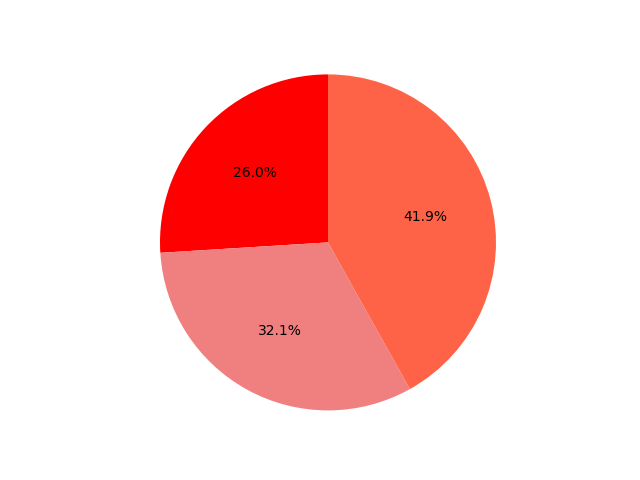

torch.Size([4, 480, 640])
torch.Size([3, 480, 640])


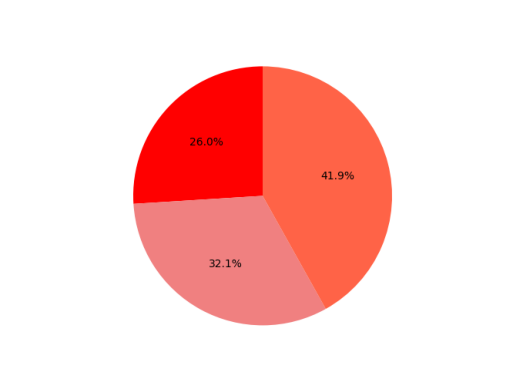

In [12]:
image = image_dataset[17201]

In [17]:
import torch

In [18]:
torch.cuda.empty_cache()